## Load Data from CSVs

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
import unicodecsv

#Always a helper function
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)



with open('daily_engagement.csv','rb') as f:
    reader= unicodecsv.DictReader(f)
    daily_engagement=list(reader)
print daily_engagement[0]

with open('project_submissions.csv','rb') as f:
    reader=unicodecsv.DictReader(f)
    project_submissions=list(reader)
print project_submissions[0]

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Problems in the Data

In [31]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for enr in daily_engagement:
    enr['account_key']=enr.pop('acct')
print daily_engagement[0]

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


In [32]:
def UniqueValue(dic,entity):
    value=set()
    for elem in dic:
       # if elem[entity] not in value:
        value.add(elem[entity])
    return value

## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [43]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.




enrollments_set=UniqueValue(enrollments,'account_key')
daily_engagement_set=UniqueValue(daily_engagement,'account_key')
project_submissions_set= UniqueValue(project_submissions,'account_key')

diff= list(enrollments_set-daily_engagement_set)
 

    

In [75]:
for en in enrollments:
    if en['account_key'] in diff:
        if en['days_to_cancel'] is not None:
            if abs((en['cancel_date']-en['join_date']).days)>0:
                #pass
                print en
        else:
            #pass
            print en
        

for ps in project_submissions:
    if ps['account_key']==1101:
        print ps
        

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


## Missing Engagement Records

In [ ]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

## Checking for More Problem Records

In [ ]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

## Tracking Down the Remaining Problems

In [76]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [78]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [79]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [98]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students ={}
for enr in non_udacity_enrollments:
    temp={}
    
    if enr['days_to_cancel'] is None or enr['days_to_cancel']>7:
        if enr['account_key'] not in paid_students or \
            enr['join_date']>paid_students[enr['account_key']]:
                paid_students[enr['account_key']] = enr['join_date']
    else:
        pass
        #print 'Yuvraj'
print len(paid_students)
 

995
1622


## Getting Data from First Week

In [112]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>=0

In [113]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
paid_engagement_in_first_week = []

for nue in non_udacity_engagement:
    if nue['account_key'] in paid_students:
        if within_one_week(paid_students[nue['account_key']],nue['utc_date']):
            paid_engagement_in_first_week.append(nue)

print len(paid_engagement_in_first_week)
print len(non_udacity_engagement)

6919
135656


## Exploring Student Engagement

In [161]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def groupElement(data, keyItem):
    group_data = defaultdict(list)
    for record in data:
        key = record[keyItem]
        group_data[key].append(record)
    return group_data

In [174]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def sumCertainRecords(data,sumItem):
    total_metrix = {}
    for key,value in data.items():
        total=0
        for records in value:
            total+=records[sumItem]
        total_metrix[key]= total
    return total_metrix

In [175]:
import numpy as np

# Summarize the data about minutes spent in the classroom
def descData(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

total_lessons= groupElement(paid_engagement_in_first_week,'account_key')
sum_of_items=sumCertainRecords(total_lessons,'lessons_completed')
descData(sum_of_items.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Debugging Data Analysis Code

In [118]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.


        
    

## Lessons Completed in First Week

In [126]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
##
import numpy as np
number_of_lesson_completed = defaultdict(list)
for en in non_udacity_engagement:
    account_key=en['account_key']
    lesson_completed=en['lessons_completed']
    number_of_lesson_completed[account_key].append(lesson_completed)

sum_number_of_lesson_completed={}
for acc,value in number_of_lesson_completed.iteritems():
    sum_number_of_lesson_completed[acc]=np.sum(value)

total_lessons= sum_number_of_lesson_completed.values()

print 'mean=',np.mean(total_lessons)
print 'standard Deviation=',np.std(total_lessons)
print 'max=',np.max(total_lessons)
print 'min=',np.min(total_lessons)

#or we can do the next one



mean= 14.198541329
standard Deviation= 16.0229362895
max= 75
min= 0


In [130]:
total_lesson_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons_completed = 0
    for engagement_record in engagement_for_student:
        total_lessons_completed += engagement_record['lessons_completed']
    total_lesson_by_account[account_key] = total_lessons_completed



In [131]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_lesson = total_lesson_by_account.values()
print 'Mean:', np.mean(total_lesson)
print 'Standard deviation:', np.std(total_lesson)
print 'Minimum:', np.min(total_lesson)
print 'Maximum:', np.max(total_lesson)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [140]:
#Analysis

for key,value in total_lesson_by_account.iteritems():
    if value == 36:
        for item in engagement_by_account[key]:
            print item


{u'lessons_completed': 10, u'num_courses_visited': 4, u'total_minutes_visited': 489.042620667, u'projects_completed': 0, 'account_key': u'633', u'utc_date': datetime.datetime(2015, 7, 17, 0, 0)}
{u'lessons_completed': 8, u'num_courses_visited': 2, u'total_minutes_visited': 264.106566334, u'projects_completed': 0, 'account_key': u'633', u'utc_date': datetime.datetime(2015, 7, 18, 0, 0)}
{u'lessons_completed': 3, u'num_courses_visited': 1, u'total_minutes_visited': 173.814019, u'projects_completed': 0, 'account_key': u'633', u'utc_date': datetime.datetime(2015, 7, 19, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 259.304326334, u'projects_completed': 0, 'account_key': u'633', u'utc_date': datetime.datetime(2015, 7, 20, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 108.428018, u'projects_completed': 0, 'account_key': u'633', u'utc_date': datetime.datetime(2015, 7, 21, 0, 0)}
{u'lessons_completed': 6, u'num_cou

## Number of Visits in First Week

In [177]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
for enr in paid_engagement_in_first_week:
    if enr['num_courses_visited']>0:
        enr['has_visited']=1
    else:
        enr['has_visited']=0
            

total_lessons= groupElement(paid_engagement_in_first_week,'account_key')
sum_of_items=sumCertainRecords(total_lessons,'has_visited')
descData(sum_of_items.values())


Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [228]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
#create paid submission
paid_submission=[]
for ent in non_udacity_submissions:
    if ent['account_key'] in paid_students.keys():
        paid_submission.append(ent)

pass_subway_project=set()
non_pass_subway_project=set()

subway_project_lesson_keys = ['746169184', '3176718735']
for ent in paid_submission:
    if ent['assigned_rating'] in ['PASSED','DISTINCTION'] and ent['lesson_key'] in subway_project_lesson_keys:
        pass_subway_project.add(ent['account_key'])
    else:
        non_pass_subway_project.add(ent['account_key'])
    
passing_engagement =[]
non_passing_engagement =[]

for ent in paid_engagement_in_first_week:
    if ent['account_key'] in pass_subway_project:
        passing_engagement.append(ent)
    else:
        non_passing_engagement.append(ent)
        
print len(passing_engagement)
print len(non_passing_engagement)


 4527
2392


## Comparing the Two Student Groups

In [231]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).


group_pass_student= groupElement(passing_engagement,'account_key')
group_non_pass_student= groupElement(non_passing_engagement,'account_key')
#Anlyze minutes spent
pass_minute_spent = sumCertainRecords(group_pass_student,'total_minutes_visited')
descData(pass_minute_spent.values())
non_pass_minute_spent = sumCertainRecords(group_non_pass_student,'total_minutes_visited')
descData(non_pass_minute_spent.values())

pass_lessons_completed = sumCertainRecords(group_pass_student,'lessons_completed')
descData(pass_lessons_completed.values())
non_pass_lessons_completed = sumCertainRecords(group_non_pass_student,'lessons_completed')
descData(non_pass_lessons_completed.values())

pass_has_visited = sumCertainRecords(group_pass_student,'has_visited')
descData(pass_has_visited.values())
non_pass_has_visited = sumCertainRecords(group_non_pass_student,'has_visited')
descData(non_pass_has_visited.values())


len(pass_has_visited)

[1452.709982333, 809.546996001, 614.9778563333, 494.88049616599994, 248.12435916639998, 713.3479524992999, 392.473794834, 35.531418, 0.0, 83.295313, 0.0, 211.3875440003, 101.387314333, 1482.9020456663002, 213.4699951663, 0.0, 199.06043566667, 338.67828999970004, 405.600248833, 421.6092228329, 192.665344, 497.8218254996, 442.37721166627, 0.0, 0.0, 0.0, 0.0, 488.40353200030006, 335.5259626667, 0.0, 1047.649452501, 311.07236283327, 1166.4244791677, 315.44705699977, 931.3076661670001, 383.1542506668, 137.2655706667, 7.94751166667, 121.07599299993, 402.42499849989997, 1020.3306876671, 830.83625116633, 1203.2224428333002, 70.48434450007001, 1435.0160603327001, 44.477798999970005, 429.03252133340004, 884.915487, 0.0, 143.048056833, 0.0, 0.0, 670.3438828333, 256.4187193326, 109.5149769999, 406.0453698336, 303.55134400000003, 61.33310733329999, 514.0743979996, 0.0, 20.247478, 1001.813550333, 184.162204667, 1065.2951291673999, 45.9874008334, 119.916663667, 90.90472849993, 46.3023048333, 0.0, 164

AttributeError: 'tuple' object has no attribute 'mean'

## Making Histograms

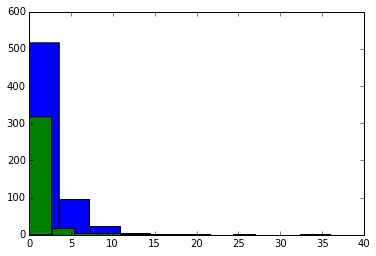

In [230]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.


import matplotlib.pyplot as plt
p=plt.hist(pass_lessons_completed.values())
np=plt.hist(non_pass_lessons_completed.values())
show(p)
show(np)

## Improving Plots and Sharing Findings

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

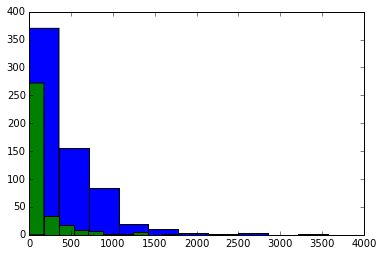

In [223]:
plt.hist(pass_minute_spent.values())
plt.hist(non_pass_minute_spent.values())

(array([ 97.,  90.,  56.,  41.,  15.,  24.,  25.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 7 Patch objects>)

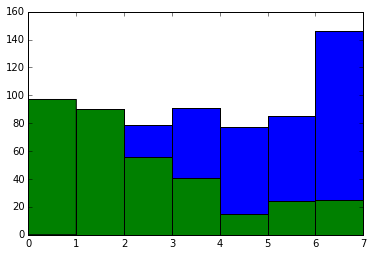

In [225]:
plt.hist(pass_has_visited.values(),bins=7)
plt.hist(non_pass_has_visited.values(),bins=7)

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

feature_list=['total_minutes_visited','num_courses_visited','lessons_completed','projects_completed']





